In [2]:
import pandas as pd

full_df = pd.read_csv(r"D:\Projects_25\Sentiment_analysis\senti\Datasets\eng_dataset_16L.csv", encoding= 'ISO-8859-1')

# full_df_ gets the two columns required that is the sentiment and the text
full_df_ = full_df[['text of the tweetï¿½', 'polarity of tweetï¿½']].copy()


In [3]:
print(full_df_.columns)

Index(['text of the tweetï¿½', 'polarity of tweetï¿½'], dtype='object')


In [4]:
full_df_.columns = ['text', 'sentiment']

In [5]:
print(full_df_.columns)
print(full_df_['sentiment'].unique())


Index(['text', 'sentiment'], dtype='object')
[0 4]


In [6]:
print(full_df_['sentiment'].value_counts())


sentiment
0    799996
4    248576
Name: count, dtype: int64


In [7]:
positive_df= full_df_[full_df_['sentiment']== 4]
negative_df= full_df_[full_df_['sentiment']== 0]


# Sample 50,000 rows from each class
positive_sample = positive_df.sample(n=240000, random_state=42)
negative_sample = negative_df.sample(n=240000, random_state=42)

# Combine them into one DataFrame
df = pd.concat([positive_sample, negative_sample], ignore_index=True)

# Optional: Shuffle the final dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
"""   df= full_df_.sample(n=10000, random_state=42)
df.columns = ['text', 'sentiment']  """

"   df= full_df_.sample(n=10000, random_state=42)\ndf.columns = ['text', 'sentiment']  "

In [9]:
print(df.head())
print(df.shape)
print(df.columns)
print(df['sentiment'].value_counts())

                                                text  sentiment
0  I think someone put wayy too much flavouring i...          0
1                    @wirespace   Make more flyers.           4
2  Is still sick. Gonna be pick at least till mon...          0
3                          Watching Pokemon with Em           4
4  @Donniewahlberg Donnie know that the gift we a...          4
(480000, 2)
Index(['text', 'sentiment'], dtype='object')
sentiment
0    240000
4    240000
Name: count, dtype: int64


In [10]:
print(df.columns.tolist())
df= df.sample(n=10000, random_state=42)


['text', 'sentiment']


In [11]:
print(df.shape)
print(df.columns)
print(df.head)
print(df['sentiment'].value_counts())

(10000, 2)
Index(['text', 'sentiment'], dtype='object')
<bound method NDFrame.head of                                                      text  sentiment
312423                       long wait on the SPI bridge           0
6849    @FromYesterday I was up yesterday reading Evig...          4
361455  Absolutely glorious day here in Perth, Scotlan...          4
5537    @NickyV487 im going to bed too, and i feel the...          0
166017  @SherylBreuker yeah lol  i love have you  on o...          4
...                                                   ...        ...
58011   @joeyvesh13 hi joey yes its me for real  i was...          4
151007  @ITBlogger Hehe, I got a lot of my cash pinche...          0
442617         seronoks dapat main Sims 2 i puas2 weee..           4
224323                 @Welshracer @angelroxy  Thank you           4
380452  @JoshBkelley did you throw away your bowling t...          0

[10000 rows x 2 columns]>
sentiment
0    5007
4    4993
Name: count, dtype: int64


In [12]:
df['sentiment']= df['sentiment'].map({0:'Negative', 4:'Positive'})
print(df['sentiment'].value_counts())

sentiment
Negative    5007
Positive    4993
Name: count, dtype: int64


In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fateh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fateh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fateh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()

In [15]:
def english_clean_text(text):
    text= text.lower()
    text=re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [16]:
df['cleaned_text'] = df['text'].apply(english_clean_text)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y =df['sentiment']

print(X.shape)
print(y.value_counts())

(10000, 5000)
sentiment
Negative    5007
Positive    4993
Name: count, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
import joblib
import os

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

os.makedirs("Datasets", exist_ok=True)
joblib.dump((X_train, y_train), "Datasets/english_train.pkl")
joblib.dump((X_test, y_test), "Datasets/english_test.pkl")

print("✅ English train/test split saved in Datasets/")

✅ English train/test split saved in Datasets/


In [ ]:
print(X_train.shape, X_test.shape)

(8000, 5000) (2000, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")
print(classification_report(y_test, y_pred))


Accuracy: 72.0%
              precision    recall  f1-score   support

    Negative       0.74      0.70      0.72      1014
    Positive       0.70      0.74      0.72       986

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



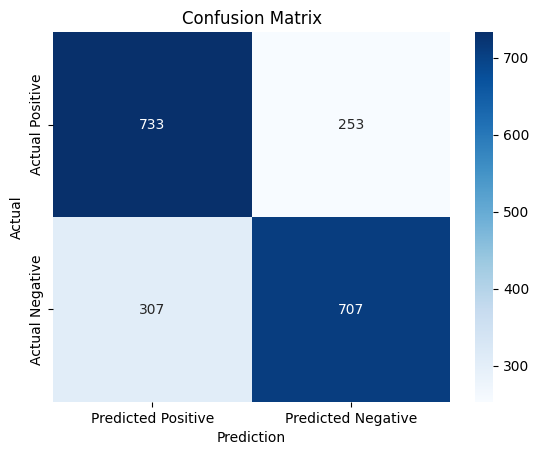

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Negative'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])

plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model= MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred= nb_model.predict(X_test)
print(f"The accuracy of Naive Bayes Model is: {accuracy_score(y_test, nb_pred)*100}%")
print(classification_report(y_test, nb_pred))

The accuracy of Naive Bayes Model is: 71.45%
              precision    recall  f1-score   support

    Negative       0.72      0.72      0.72      1014
    Positive       0.71      0.71      0.71       986

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



Saving the trained model

In [ ]:
import joblib

joblib.dump(model, 'eng_log_reg_model.pkl')
joblib.dump(nb_model, 'eng_n_b_model.pkl')
joblib.dump(vectorizer, 'eng_tfidf_vectorizer.pkl')

['eng_tfidf_vectorizer.pkl']

Trying to load and use the saved models


In [ ]:
import joblib

model= joblib.load('eng_log_reg_model.pkl')
vectorizer= joblib.load('eng_tfidf_vectorizer.pkl')

Tried using the loaded models to test a random sentence

In [ ]:
text='this food is trash'
cleaned= english_clean_text(text)
vectorized= vectorizer.transform([cleaned])
prediction= model.predict(vectorized)
print(f"predicted sentiment: {prediction[0]}")

predicted sentiment: Positive
